# K Means Clustering, Iris Flower Classification

### Project Level : Beginner
Author : B. M. Suhaib

Task :
1. From the given iris dataset, Predict the optimum number of clusters.
2. Try to form clusters of flowers using petal width and length features. Drop other 2 features for simplicity.
3. Find optimum number of custers using Elbow plot

## IRIS dataset :
The Iris flower data set or Fisher's Iris data set is a multivariate data set introduced by the British statistician and biologist Ronald Fisher in his 1936 paper The use of multiple measurements in taxonomic problems as an example of linear discriminant analysis. It is sometimes called Anderson's Iris data set because Edgar Anderson collected the data to quantify the morphologic variation of Iris flowers of three related species. Two of the three species were collected in the Gaspé Peninsula "all from the same pasture, and picked on the same day and measured at the same time by the same person with the same apparatus".

The data set consists of 50 samples from each of 3 species of Iris.

Species : Iris setosa, Iris virginica and Iris versicolor. 

4 Features were measured from each sample : 
- sepal length (cm)	
- sepal width (cm)	
- petal length (cm)	
- petal width (cm)

Based on the combination of these 4 features, Fisher developed a linear discriminant model to distinguish the species from each other.

Dataset Link : https://github.com/AnalystSpot/Data-Science/blob/main/Prediction%20using%20Unsupervised%20Learning/Iris.csv

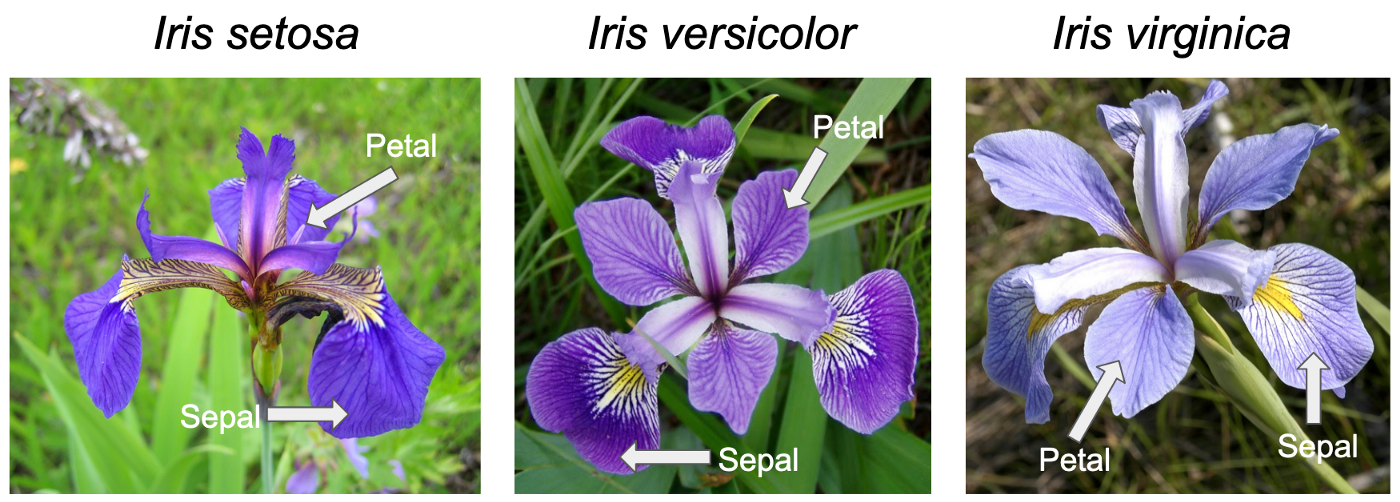
Source : https://miro.medium.com/max/1400/1*f6KbPXwksAliMIsibFyGJw.png

# The Elbow Method

### Steps used :
1. Import
2. Visualize
3. Model creation & SSE / WCSS finding
4. Elbow Plot

In [1]:
# To ignore the warnings
import warnings
warnings.filterwarnings('ignore')

### 1. Import Modules and Dataset

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.cluster import KMeans

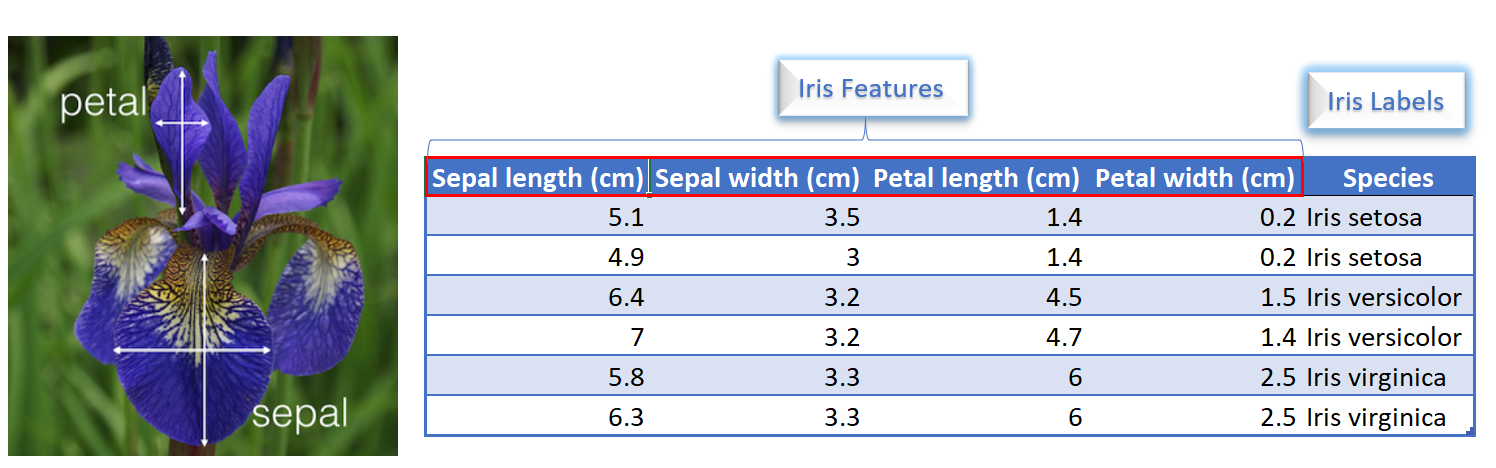

In [3]:
data=pd.read_csv('iris.csv')
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


#### Direct way of Importing iris dataset from sklearn module

In [4]:
# from sklearn.datasets import load_iris
# iris=load_iris()
# dir(iris)

In [5]:
# import pandas as pd
# df=pd.DataFrame(iris.data,columns=iris.feature_names)
# df.head()

### 2. Visualize

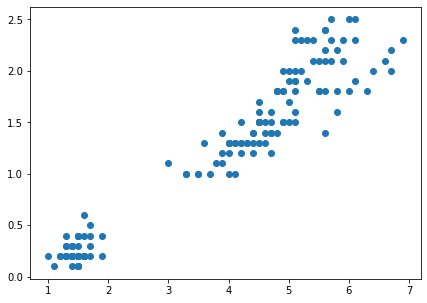

In [6]:
plt.figure(figsize=(7,5))
plt.scatter(data.PetalLengthCm,data.PetalWidthCm)

### 3. KMeans model

In [7]:
# Considering 10 clusters 
k_range=range(1,10)
sum_of_square_error=[]

for k in k_range:
    km=KMeans(n_clusters=k)
    km.fit(data[['PetalLengthCm','PetalWidthCm']])
    sum_of_square_error.append(km.inertia_)
    
sum_of_square_error

[550.6434666666671,
 86.40394533570999,
 31.38775897435898,
 19.49352336396547,
 13.93330875790876,
 11.052733877751736,
 9.297743349632828,
 7.726251190476193,
 6.61284936947111]

### 4. Elbow PLot

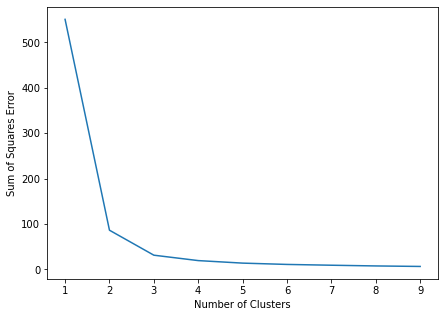

In [8]:
plt.figure(figsize=(7,5))
plt.xlabel('Number of Clusters')
plt.ylabel('Sum of Squares Error')
plt.plot(k_range,sum_of_square_error)

## Result
You can clearly see why it is called 'The elbow method' from the above graph, the optimum clusters is where the elbow occurs. This is when the Sum of Squared error(SSE) or within cluster sum of squares (WCSS) doesn't decrease significantly with every iteration.

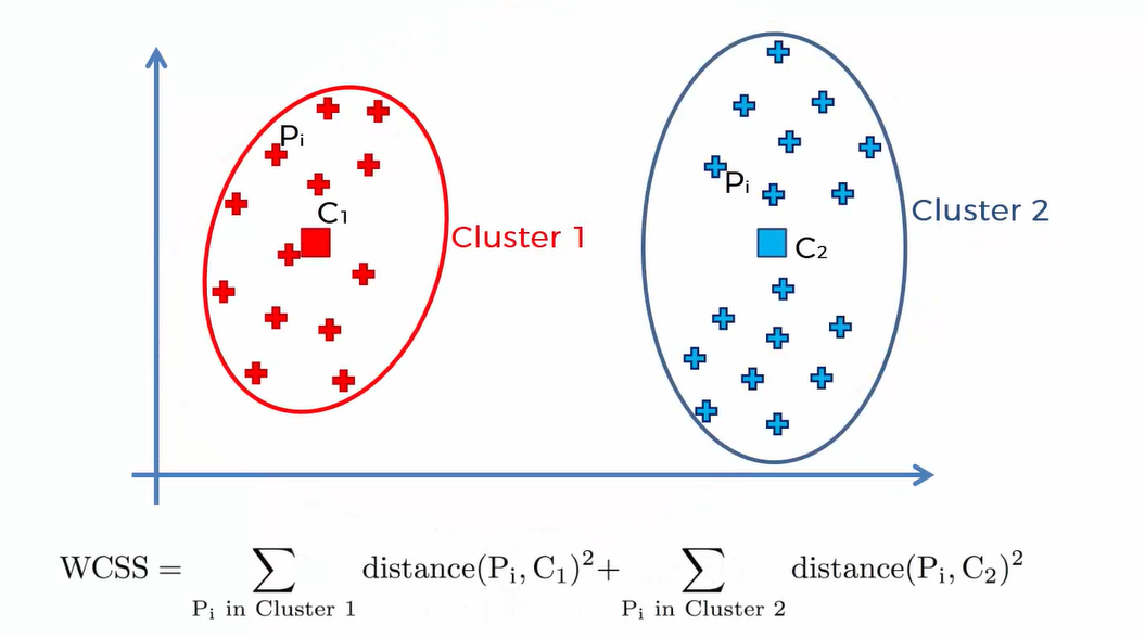
Source : https://miro.medium.com/max/1400/1*Z2GxeXTHXUz_8_4pI-w55g.png
From this we choose the number of clusters as **3**

<hr/>

### To predict which cluster group particular row belongs to :

In [9]:
km=KMeans(n_clusters=3)
y_pred=km.fit_predict(data[['PetalLengthCm','PetalWidthCm']])
y_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [10]:
data['cluster']=y_pred
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,cluster
0,1,5.1,3.5,1.4,0.2,Iris-setosa,1
1,2,4.9,3.0,1.4,0.2,Iris-setosa,1
2,3,4.7,3.2,1.3,0.2,Iris-setosa,1
3,4,4.6,3.1,1.5,0.2,Iris-setosa,1
4,5,5.0,3.6,1.4,0.2,Iris-setosa,1


### Plot 3 Clusters

In [11]:
data0=data[data.cluster==0]
data1=data[data.cluster==1]
data2=data[data.cluster==2]

In [12]:
#centroid of cluster
km.cluster_centers_

array([[4.26923077, 1.34230769],
       [1.464     , 0.244     ],
       [5.59583333, 2.0375    ]])

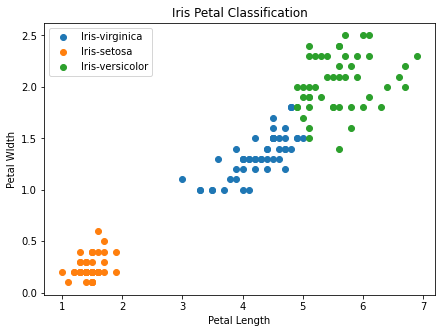

In [13]:
plt.figure(figsize=(7,5))
plt.scatter(data0.PetalLengthCm,data0.PetalWidthCm,label='Iris-virginica')
plt.scatter(data1.PetalLengthCm,data1.PetalWidthCm,label='Iris-setosa')
plt.scatter(data2.PetalLengthCm,data2.PetalWidthCm,label='Iris-versicolor')

plt.title('Iris Petal Classification')
plt.xlabel('Petal Length')
plt.ylabel('Petal WIdth')
plt.legend()
plt.show()

### Findings :
1. If Petal Length and Petal width is more then Iris-versicolor
2. If Petal Length and Petal width is less then Iris-setosa
3. If Petal Length and Petal width is in between then Iris-virginica (3-5)

<hr/>

### Similarly for Sepal :

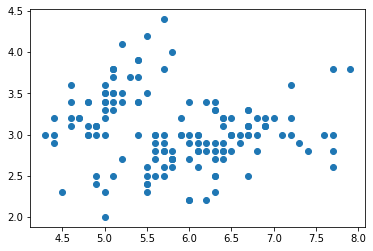

In [14]:
plt.scatter(data.SepalLengthCm,data.SepalWidthCm)

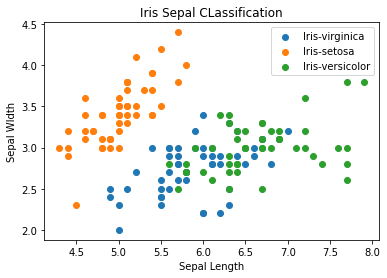

In [15]:
k_range=range(1,10)
sum_of_square_error=[]

for k in k_range:
    km=KMeans(n_clusters=k)
    km.fit(data[['PetalLengthCm','PetalWidthCm']])
    sum_of_square_error.append(km.inertia_)
    
data['cluster1']=y_pred

data0=data[data.cluster==0]
data1=data[data.cluster==1]
data2=data[data.cluster==2]

plt.scatter(data0.SepalLengthCm,data0.SepalWidthCm,label='Iris-virginica')
plt.scatter(data1.SepalLengthCm,data1.SepalWidthCm,label='Iris-setosa')
plt.scatter(data2.SepalLengthCm,data2.SepalWidthCm,label='Iris-versicolor')

plt.title('Iris Sepal CLassification')
plt.xlabel('Sepal Length')
plt.ylabel('Sepal WIdth')
plt.legend()
plt.show()

### Code & csv file is available @ github - AnalystSpot : 
https://github.com/AnalystSpot/Data-Science/tree/main/Prediction%20using%20Unsupervised%20Learning
<h3 color='red'>Note : Fork the repository to review whenever you want.</h3>